In [1]:
from simulation import Room, Roomba, Simulation
import statistics as st
import random

In [2]:
roomba = Roomba(0, 0, angle=10)
room = Room(10, 10)
sim = Simulation(room, [roomba])

In [3]:
sim.run()

{0.5: 74, 0.9: 316, 1.0: 840}

In [4]:
sim1000results = []
for i in range(1000):
    roomba = Roomba(0, 0, angle=10)
    room = Room(10, 10)
    sim = Simulation(room, [roomba])
    sim1000results.append(sim.run())

In [5]:
st.mean([r[.9] for r in sim1000results])

295.609

In [6]:
class SideTurningRoomba(Roomba):
    def collide(self):
        if random.random() > 0.5:
            self.turn(random.randint(30, 120))
        else:
            self.turn(random.randint(240, 330))

In [7]:
def n_trials(n, roomba_type=Roomba):
    results = []
    for _ in range(n):
        roomba = roomba_type(0, 0, angle=10)
        room = Room(10, 10)
        sim = Simulation(room, [roomba])
        results.append(sim.run())
    return (st.mean(r[.5] for r in results),
            st.mean(r[.9] for r in results),
            st.mean(r[1.0] for r in results))

In [8]:
n_trials(100, Roomba)

(87.0, 284.1, 707.1)

In [9]:
n_trials(100, SideTurningRoomba)

(93.28, 327.67, 823.14)

In [10]:
class BackTurningRoomba(Roomba):
    def collide(self):
        self.turn(random.randint(120, 240))

In [11]:
n_trials(100, BackTurningRoomba)

(88.33, 313.43, 712.76)

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

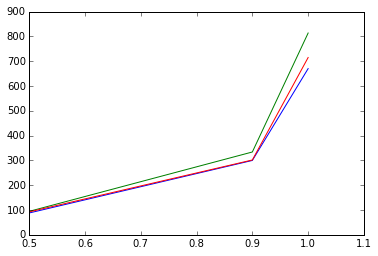

In [14]:
roomba_trials = n_trials(200, Roomba)
side_trials = n_trials(200, SideTurningRoomba)
back_trials = n_trials(200, BackTurningRoomba)

In [18]:
class SpeedyRoomba(Roomba):
    def __init__(self, x=0, y=0, angle=0):
        super().__init__(x, y, angle)
        self.speed = 1.5

In [20]:
speed_trials = n_trials(200, SpeedyRoomba)

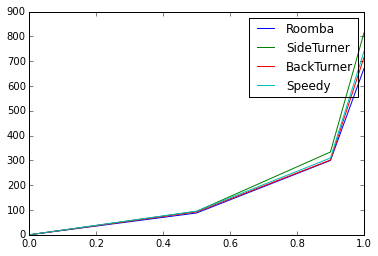

In [21]:
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(roomba_trials), label="Roomba")
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(side_trials), label="SideTurner")
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(back_trials), label="BackTurner")
plt.plot([0, 0.5, 0.9, 1.0], [0] + list(speed_trials), label="Speedy")
plt.legend()
plt.show()